In [671]:

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
import pandas as pd 
import numpy as np
import warnings
from sklearn import linear_model
#import seaborn as sns
#from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
%matplotlib inline 

In [672]:
source_data_file = pd.read_csv(r'raw-data\all-ops-2006-2013-extract-2.csv', parse_dates=['Date'], thousands=',', decimal='.')
#.dropna()

source_columns_list_initial = ['Executed','Date','Expense amount','Income amount']
#['Executed','Date','Income account','Income amount','Income balance','Expense account','Expense amount','Expense balance','Comment','Category','Agent']

source_columns_list_to_delete = ['Executed']

training_data_percentage = 0.75

In [673]:
#######################################
# vars setup/reset
# cleaning the variable
if 'my_data_frame' in locals():
  del my_data_frame  
if 'source_columns_list' in locals():
  del source_columns_list

source_columns_list = list (set(source_columns_list_initial) - set (source_columns_list_to_delete))  
print ('source_columns_list',source_columns_list)
#######################################

source_columns_list ['Date', 'Income amount', 'Expense amount']


In [674]:
#######################################
## Cleaning data to process ###########
# loading initial DataFrame 
my_data_frame = pd.DataFrame(source_data_file, columns= source_columns_list_initial ).replace(r'Света',r'Agent-1').replace(r'Вадим',r'Agent-2').replace(r'Архипп',r'Agent-3')
# .drop_duplicates(inplace = True) #.fillna('')
my_data_frame.info()

# dropping records with Executed != +my_data_frame.drop(my_data_frame[my_data_frame.Executed != '+'].index, inplace=True) 
my_data_frame.drop(columns = source_columns_list_to_delete , inplace=True) 
# exclude 2013 
my_data_frame.drop( my_data_frame[my_data_frame['Income amount'] >  150000 ].index, inplace=True) 
my_data_frame.drop( my_data_frame[my_data_frame['Expense amount'] <  -150000 ].index, inplace=True) 
my_data_frame.sort_values(by=['Date'])
#my_data_frame.drop( my_data_frame[my_data_frame['Date'] <  ???? ].index, inplace=True) 

#########################################
# lets visualise
        # my_data_frame.reindex(columns=['Income amount', 'Expense amount','Expense balance'])
        ## sns.pairplot(my_data_frame, x_vars=['Income amount', 'Expense amount','Expense balance'],y_vars='Date', size=4, aspect=1, kind='scatter')
        ## plt.show()
#########################################

#my_data_frame_size = int(my_data_frame.size / len(source_columns_list ))

#print ('DataFrame size = ' , my_data_frame_size)
#my_training_data_size = round (my_data_frame_size /100 * training_data_percentage ) 
#my_test_data_size = my_data_frame_size - my_training_data_size


#my_training_data = my_data_frame[0:my_training_data_size]
#my_training_data.head(my_training_data_size * len(source_columns_list ))
#my_test_data = my_data_frame[my_training_data_size:my_data_frame_size ]

#print ('my_training_data_size  = ' , my_training_data_size)
#print ('my_training_data.size  = ' , my_training_data.size)
#print ('my_test_data_size size = ' , my_test_data_size)
#print (my_training_data['Expense amount'].tail(3))
#print (my_test_data['Expense amount'].head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9661 entries, 0 to 9660
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Executed        9604 non-null   object        
 1   Date            9661 non-null   datetime64[ns]
 2   Expense amount  9037 non-null   float64       
 3   Income amount   1469 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 302.0+ KB


,Date,Expense amount,Income amount
0,2006-01-02 22:47:00,NaN,1500.00
1,2006-01-02 22:48:00,-690.0,NaN
2,2006-01-02 22:49:00,-15.0,NaN
3,2006-01-02 22:49:00,-76.0,NaN
78,2006-01-03 21:35:00,-81.8,NaN
...,...,...,...
9656,2012-12-30 20:33:00,-9200.0,9200.00
9657,2012-12-30 20:35:00,NaN,2.19
9658,2012-12-30 20:48:00,-125.4,NaN
9659,2012-12-31 20:48:00,-381.9,NaN


In [675]:
my_grouped_dataset = my_data_frame.groupby(pd.Grouper(key='Date',freq="M")).sum().sort_values(by=['Date'], ascending=True).copy()
############# Negative or positive???
# my_grouped_dataset['Expense amount'] = my_grouped_dataset['Expense amount'].abs()

#my_grouped_dataset.reset_index()
#################################
###  Lagged Expenses for further analysis 
#################################
#my_grouped_dataset['Expense amount lagged'] = my_grouped_dataset['Expense amount'].shift(1)

my_grouped_dataset_training, my_grouped_dataset_testing = train_test_split ( my_grouped_dataset, test_size=0.3)

## checking columns on the Dataframe
#col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(my_grouped_dataset_testing.columns)]
#print(col_mapping) # ['0:Expense amount', '1:Income amount']
#print(my_grouped_dataset_training['Expense amount'])


print(my_grouped_dataset_training.head(10))


            Expense amount  Income amount
Date                                     
2011-11-30      -390542.85      419199.21
2012-07-31      -114843.96      154460.67
2008-11-30      -319325.40      620793.64
2009-03-31      -126000.56       80743.00
2009-02-28      -250951.75      210054.32
2012-11-30      -219360.30      184247.17
2012-02-29      -216657.28      178886.37
2011-08-31      -285081.81      349981.07
2007-03-31      -111457.15       97899.00
2007-02-28      -166944.70      128499.00


<Figure size 432x288 with 0 Axes>

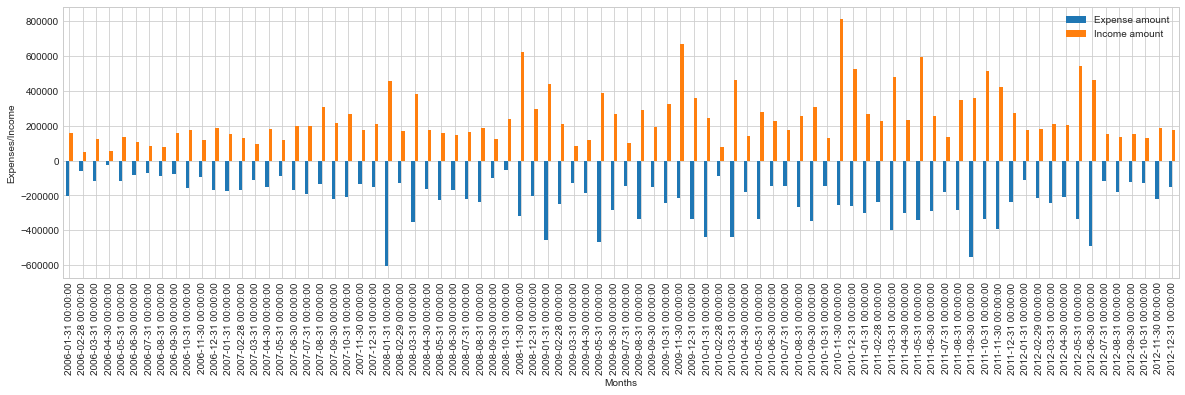

In [676]:
plt.clf()
my_grouped_dataset.sort_values(by=['Date']).plot(kind='bar',figsize = (20,5)) 
plt.xlabel("Months")
plt.ylabel("Expenses/Income")

plt.show()


In [677]:
X_train = my_grouped_dataset_training[['Income amount']] 
Y_train = my_grouped_dataset_training[['Expense amount']] 



regr_model = linear_model.LinearRegression()
regr_model.fit(X_train, Y_train)

print('Intercept: \n', regr_model.intercept_)
print('Coefficients: \n', regr_model.coef_)

# print('regr_model.predict(236606.02) = ',regr_model.predict([[236606.02]]))


Intercept: 
 [-88036.09773383]
Coefficients: 
 [[-0.5574961]]


In [678]:

#my_grouped_dataset_testing['Predicted Expense'] = my_grouped_dataset_testing.apply( lambda row: str(regr_model.predict([[ row['Income amount'] ]])) + ' for '+str(row['Income amount']) , axis = 1)

my_grouped_dataset_testing['Predicted Expense'] = my_grouped_dataset_testing.apply( lambda row: float(regr_model.predict([[ row['Income amount'] ]]))  , axis = 1)

#print(my_grouped_dataset_testing['Predicted Expense'].head (10))
print(my_grouped_dataset_testing.head (10))


            Expense amount  Income amount  Predicted Expense
Date                                                        
2012-05-31      -333722.62      539887.52     -389021.284386
2009-09-30      -149572.53      194905.75     -196695.293159
2012-04-30      -208917.97      206520.52     -203170.482133
2010-03-31      -440119.43      460939.11     -345007.853737
2012-06-30      -490455.70      461369.04     -345247.538036
2010-07-31      -146260.29      173744.91     -184898.207394
2006-02-28       -58736.72       48530.00     -115091.383450
2008-06-30      -169168.86      144804.93     -168764.281420
2011-05-31      -339691.02      596185.50     -420407.188655
2009-04-30      -187900.70      119101.82     -154434.897846


<Figure size 432x288 with 0 Axes>

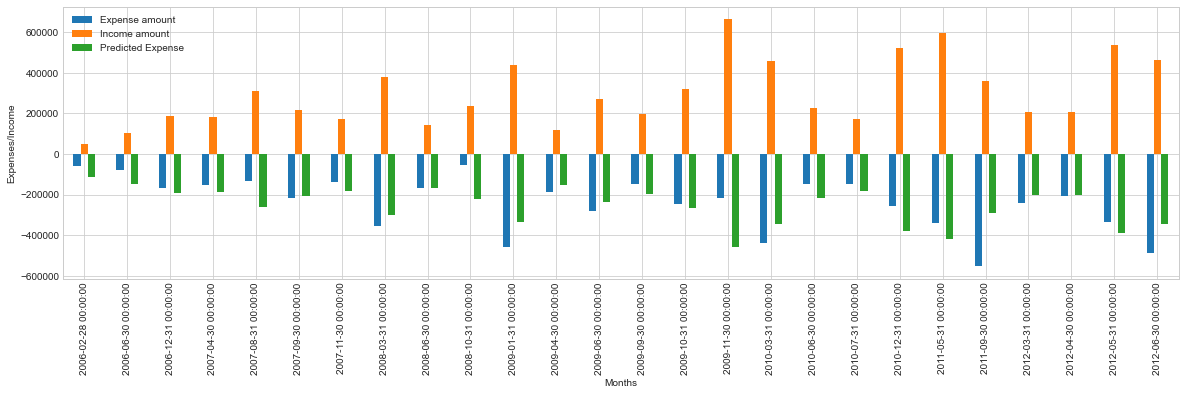

In [679]:
plt.clf()
my_grouped_dataset_testing.sort_values(by=['Date']).plot(kind='bar',figsize = (20,5)) 
plt.xlabel("Months")
plt.ylabel("Expenses/Income")

plt.show()

In [681]:
# Compute the root-mean-square

rms = np.sqrt(mean_squared_error(my_grouped_dataset_testing[['Expense amount']] , my_grouped_dataset_testing[['Predicted Expense']]))
print(rms)
##101759.18090515472

101759.18090515472
